In [2]:
import pandas as pd

In [3]:
houseData = pd.read_csv("train.csv")
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

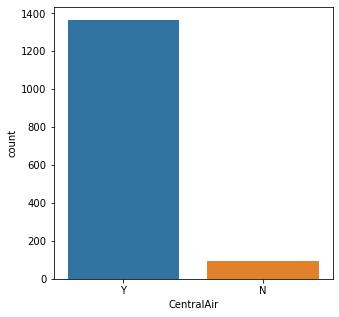

In [5]:
f, axes = plt.subplots(1, 1, figsize=(5, 5))
sb.countplot(houseData["CentralAir"])

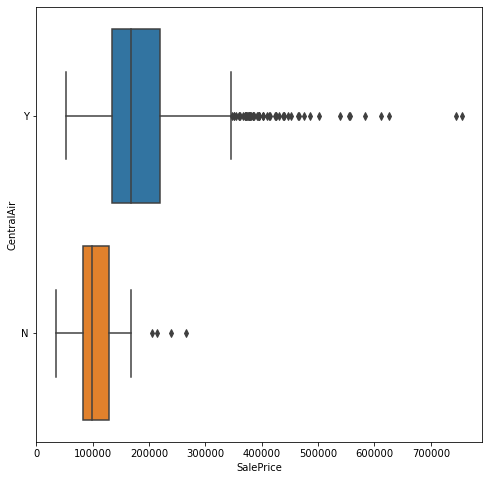

In [6]:
central_air = pd.DataFrame(houseData["CentralAir"])
sale_price = pd.DataFrame(houseData["SalePrice"])
jointDF = pd.concat([central_air, sale_price], axis=1)
f, axes = plt.subplots(1, 1, figsize=(8, 8))
# jointDF.info()

sb.boxplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

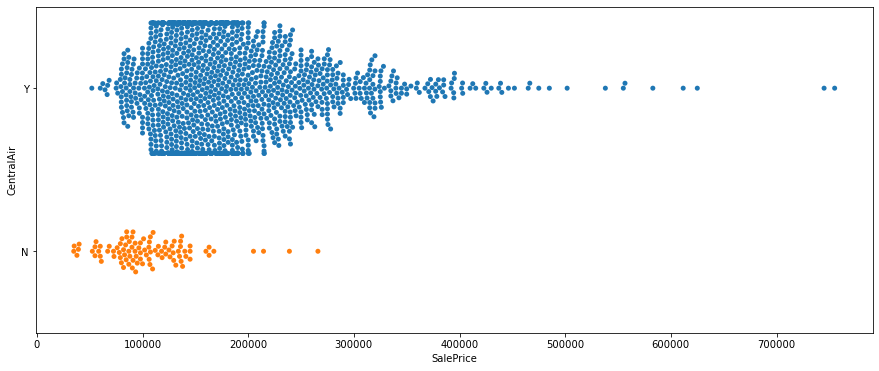

In [7]:
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
houseData_train = houseData[:1100]
houseData_test = houseData[-360:]
print(houseData_train.shape, houseData_test.shape)

(1100, 81) (360, 81)


In [10]:
y_train = pd.DataFrame(houseData_train["CentralAir"])
X_train = pd.DataFrame(houseData_train["SalePrice"])

In [11]:
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

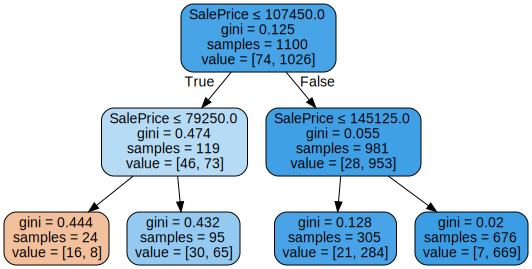

In [13]:
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,
                         feature_names = X_train.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)

import graphviz
graphviz.Source(treedot)